In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wr
wr.filterwarnings(action="ignore")
import seaborn as sns

# **Data Loading**

In [76]:
account = pd.read_csv("/content/account_activity.csv")
customer = pd.read_csv("/content/customer_data.csv")
fraud = pd.read_csv("/content/fraud_indicators.csv")
suspision = pd.read_csv("/content/suspicious_activity.csv")
merchant = pd.read_csv("/content/merchant_data.csv")
tran_cat = pd.read_csv("/content/transaction_category_labels.csv")
amount = pd.read_csv("/content/amount_data.csv")
anamoly = pd.read_csv("/content/anomaly_scores.csv")
tran_data = pd.read_csv("/content/transaction_metadata.csv")
tran_rec = pd.read_csv("/content/transaction_records.csv")

In [77]:
data = [account,customer,fraud,suspision,merchant,tran_cat,amount,anamoly,tran_data,tran_rec]

In [78]:
for df in data:
    print(df.head())

   CustomerID  AccountBalance   LastLogin
0        1001     9507.272060  2022-01-01
1        1002     7408.704536  2022-01-02
2        1003     1715.321989  2022-01-03
3        1004     3101.509134  2022-01-04
4        1005     5405.766914  2022-01-05
   CustomerID           Name  Age       Address
0        1001  Customer 1001   54  Address 1001
1        1002  Customer 1002   35  Address 1002
2        1003  Customer 1003   40  Address 1003
3        1004  Customer 1004   30  Address 1004
4        1005  Customer 1005   46  Address 1005
   TransactionID  FraudIndicator
0              1               0
1              2               0
2              3               0
3              4               0
4              5               0
   CustomerID  SuspiciousFlag
0        1001               0
1        1002               0
2        1003               0
3        1004               0
4        1005               0
   MerchantID   MerchantName       Location
0        2001  Merchant 2001  Location

In [79]:
costumer_data = pd.merge(customer, account, on='CustomerID')
costumer_data = pd.merge(costumer_data, suspision, on='CustomerID')
costumer_data

,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1001,Customer 1001,54,Address 1001,9507.272060,2022-01-01,0
1,1002,Customer 1002,35,Address 1002,7408.704536,2022-01-02,0
2,1003,Customer 1003,40,Address 1003,1715.321989,2022-01-03,0
3,1004,Customer 1004,30,Address 1004,3101.509134,2022-01-04,0
4,1005,Customer 1005,46,Address 1005,5405.766914,2022-01-05,0
...,...,...,...,...,...,...,...
995,1996,Customer 1996,33,Address 1996,8523.485163,2024-09-22,0
996,1997,Customer 1997,58,Address 1997,9255.451757,2024-09-23,0
997,1998,Customer 1998,25,Address 1998,9148.652759,2024-09-24,0
998,1999,Customer 1999,57,Address 1999,7376.854107,2024-09-25,0


In [80]:
transaction_data1 = pd.merge(fraud, tran_cat, on="TransactionID")
transaction_data2 = pd.merge(amount, anamoly, on="TransactionID")
transaction_data3 = pd.merge(tran_data, tran_rec, on="TransactionID")
transaction_data = pd.merge(transaction_data1, transaction_data2,on="TransactionID")
transaction_data = pd.merge(transaction_data, transaction_data3,on="TransactionID")

In [81]:
transaction_data


,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID
0,1,0,Other,79.413607,0.686699,2022-01-01 00:00:00,2701,55.530334,1952
1,2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,2070,12.881180,1027
2,3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,2238,50.176322,1955
3,4,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,2879,41.634001,1796
4,5,0,Other,54.051618,0.034059,2022-01-01 04:00:00,2966,78.122853,1946
...,...,...,...,...,...,...,...,...,...
995,996,0,Food,89.457059,0.266778,2022-02-11 11:00:00,2150,19.876750,1411
996,997,0,Retail,47.958030,0.512483,2022-02-11 12:00:00,2888,96.299792,1566
997,998,0,Food,64.210046,0.367740,2022-02-11 13:00:00,2037,75.164459,1654
998,999,0,Travel,64.684167,0.960364,2022-02-11 14:00:00,2629,93.633040,1928


In [82]:
data = pd.merge(transaction_data, costumer_data,on="CustomerID")
data

,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1,0,Other,79.413607,0.686699,2022-01-01 00:00:00,2701,55.530334,1952,Customer 1952,50,Address 1952,2869.689912,2024-08-09,0
1,2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,2070,12.881180,1027,Customer 1027,46,Address 1027,9527.947107,2022-01-27,0
2,3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,2238,50.176322,1955,Customer 1955,34,Address 1955,9288.355525,2024-08-12,0
3,4,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,2879,41.634001,1796,Customer 1796,33,Address 1796,5588.049942,2024-03-06,0
4,5,0,Other,54.051618,0.034059,2022-01-01 04:00:00,2966,78.122853,1946,Customer 1946,18,Address 1946,7324.785332,2024-08-03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,Food,89.457059,0.266778,2022-02-11 11:00:00,2150,19.876750,1411,Customer 1411,19,Address 1411,1290.323059,2023-02-15,0
996,997,0,Retail,47.958030,0.512483,2022-02-11 12:00:00,2888,96.299792,1566,Customer 1566,39,Address 1566,7067.831609,2023-07-20,0
997,998,0,Food,64.210046,0.367740,2022-02-11 13:00:00,2037,75.164459,1654,Customer 1654,51,Address 1654,9088.738359,2023-10-16,0
998,999,0,Travel,64.684167,0.960364,2022-02-11 14:00:00,2629,93.633040,1928,Customer 1928,60,Address 1928,9352.655675,2024-07-16,0


<div style="background-color: #bde0fe; border-radius: 10px; text-align: center; padding: 20px;">
    <h1 style="color: black;">Data Exploration</h1>
</div>


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      1000 non-null   int64  
 1   FraudIndicator     1000 non-null   int64  
 2   Category           1000 non-null   object 
 3   TransactionAmount  1000 non-null   float64
 4   AnomalyScore       1000 non-null   float64
 5   Timestamp          1000 non-null   object 
 6   MerchantID         1000 non-null   int64  
 7   Amount             1000 non-null   float64
 8   CustomerID         1000 non-null   int64  
 9   Name               1000 non-null   object 
 10  Age                1000 non-null   int64  
 11  Address            1000 non-null   object 
 12  AccountBalance     1000 non-null   float64
 13  LastLogin          1000 non-null   object 
 14  SuspiciousFlag     1000 non-null   int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 117.3+ KB


In [84]:
data.shape

(1000, 15)

In [85]:
data.describe()

,TransactionID,FraudIndicator,TransactionAmount,AnomalyScore,MerchantID,Amount,CustomerID,Age,AccountBalance,SuspiciousFlag
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.045000,55.853826,0.492282,2504.701000,55.394871,1496.626000,39.848000,5715.455931,0.025000
std,288.819436,0.207408,26.093606,0.288423,288.414883,25.070809,289.229047,13.074932,2540.517262,0.156203
min,1.000000,0.000000,10.057864,0.000234,2001.000000,10.006933,1001.000000,18.000000,1056.301181,0.000000
25%,250.750000,0.000000,33.875129,0.251802,2254.500000,34.502315,1239.000000,29.000000,3489.554711,0.000000
50%,500.500000,0.000000,55.958313,0.490242,2500.500000,57.844325,1501.000000,39.000000,5753.007775,0.000000
75%,750.250000,0.000000,77.589391,0.741888,2761.250000,75.858576,1739.250000,51.000000,7925.710167,0.000000
max,1000.000000,1.000000,99.784323,0.999047,3000.000000,99.887410,2000.000000,64.000000,9999.776239,1.000000


In [86]:

data.columns

Index(['TransactionID', 'FraudIndicator', 'Category', 'TransactionAmount',
       'AnomalyScore', 'Timestamp', 'MerchantID', 'Amount', 'CustomerID',
       'Name', 'Age', 'Address', 'AccountBalance', 'LastLogin',
       'SuspiciousFlag'],
      dtype='object')

In [87]:
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print(numerical_features)
print(categorical_features)

['TransactionID', 'FraudIndicator', 'TransactionAmount', 'AnomalyScore', 'MerchantID', 'Amount', 'CustomerID', 'Age', 'AccountBalance', 'SuspiciousFlag']
['Category', 'Timestamp', 'Name', 'Address', 'LastLogin']


<div style="background-color: #cdb4db; border-radius: 10px; text-align: center; padding: 20px;">
    <h1 style="color: black;">Data Visualization</h1>
</div>


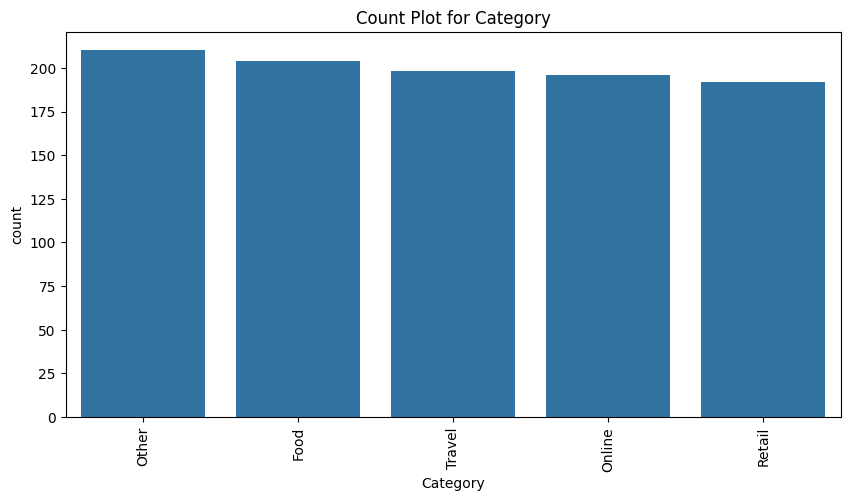

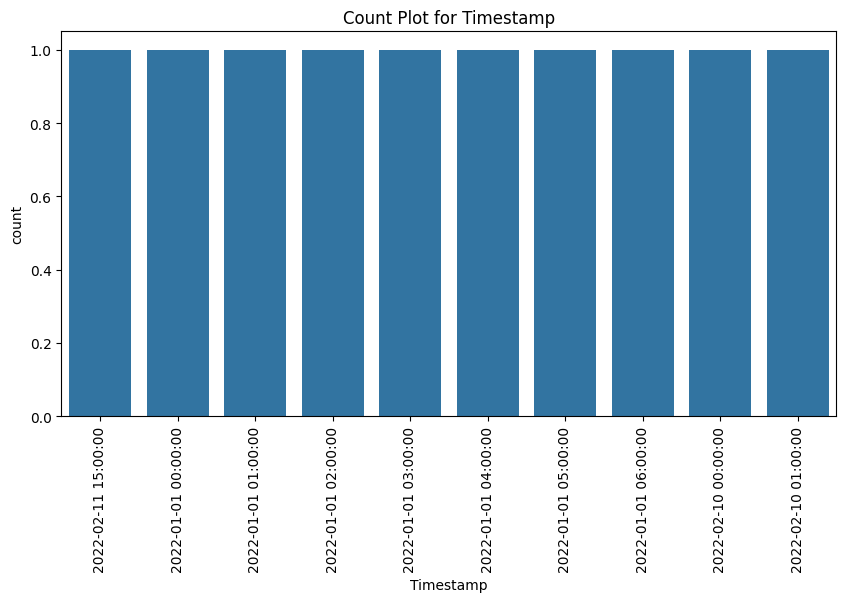

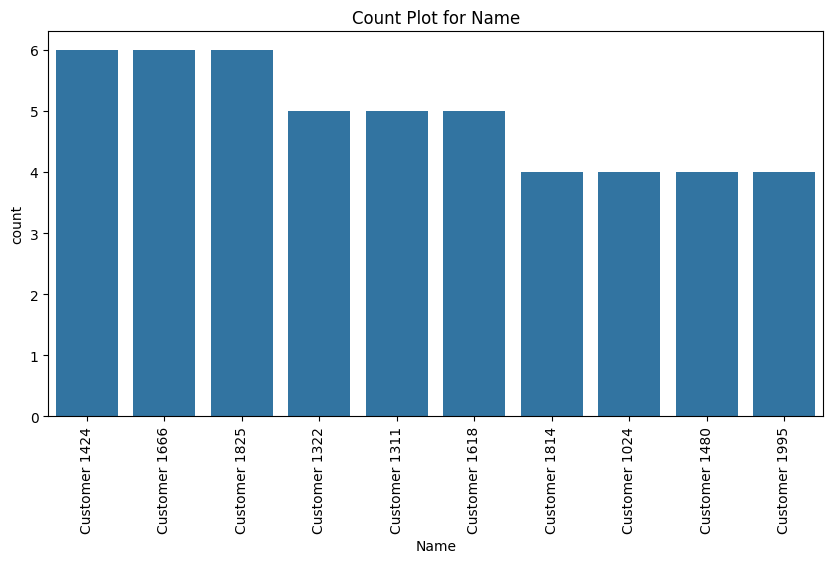

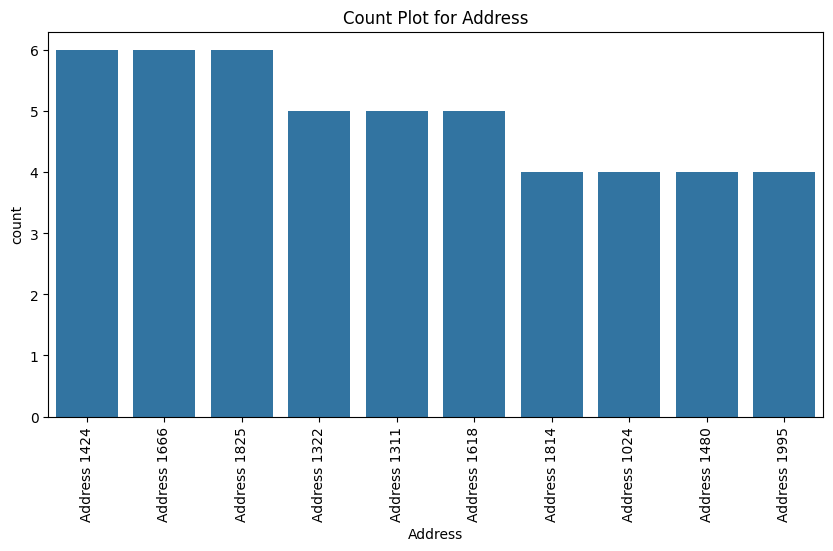

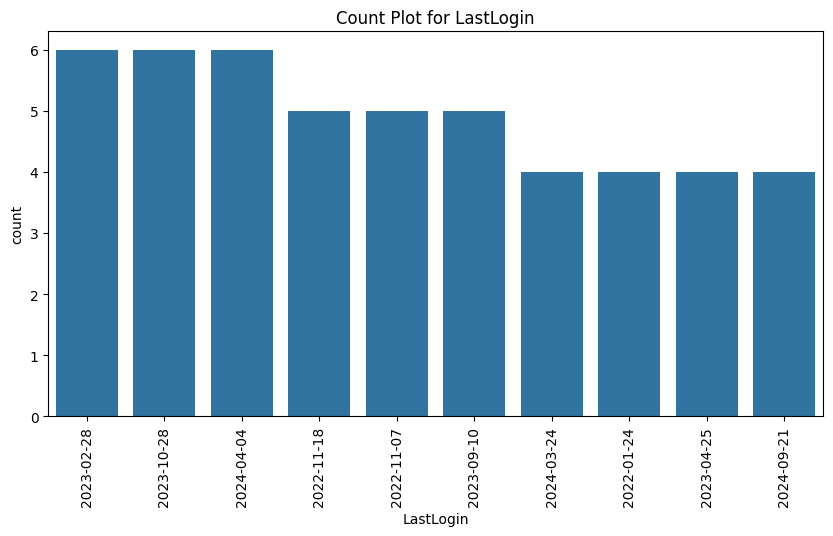

In [88]:
for column in data.columns:
    if data[column].dtype == 'object':  # Check if the column has a categorical data type
        top_10_values = data[column].value_counts().head(10)  # Get the first 10 unique values and their counts
        plt.figure(figsize=(10, 5))  # Adjust the figure size if needed
        sns.countplot(x=column, data=data, order=top_10_values.index)
        plt.title(f'Count Plot for {column}')
        plt.xticks(rotation=90)  # Rotate x-axis labels if they are long
        plt.show()


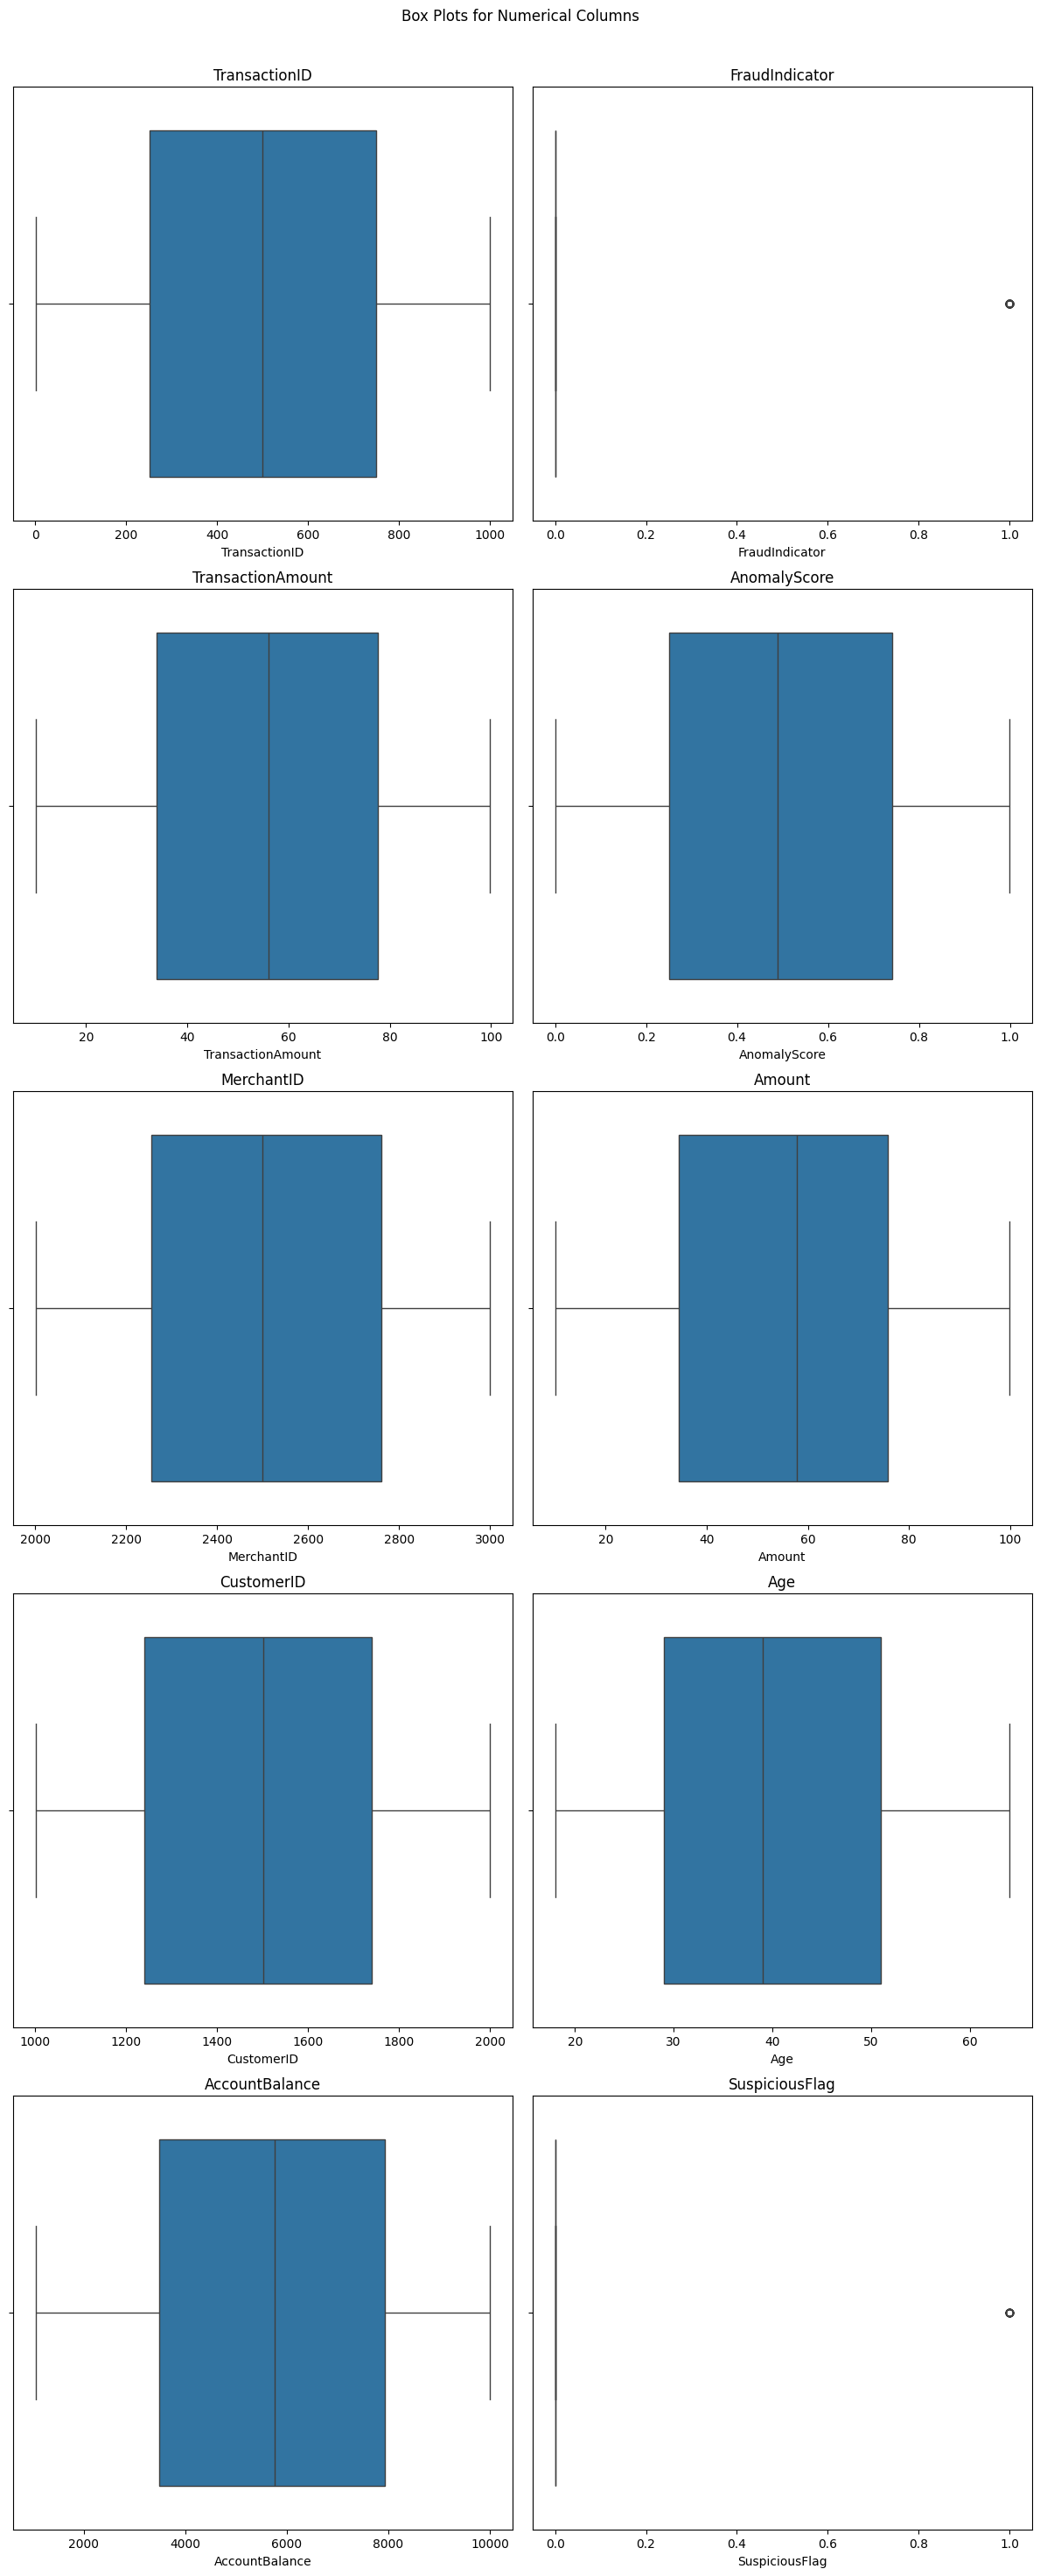

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing numerical columns

# Get the number of numerical columns
num_cols = len(data.select_dtypes(include=['number']).columns)

# Calculate the number of rows and columns for subplots
num_rows = (num_cols // 2) + (num_cols % 2)

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))
fig.suptitle("Box Plots for Numerical Columns")

# Loop through the numerical columns and create box plots
for i, column in enumerate(data.select_dtypes(include=['number']).columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=data[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Remove any empty subplots
if num_cols % 2 != 0:
    fig.delaxes(axes[num_rows-1, 1])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the position of the overall title
plt.show()


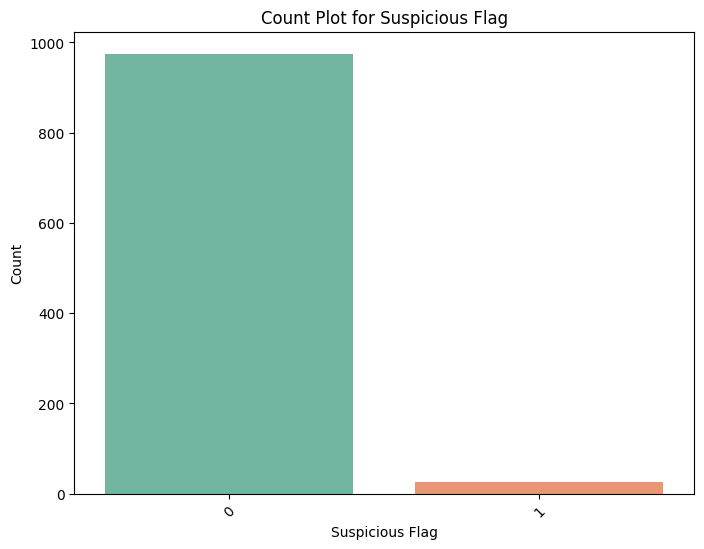

In [90]:
# We should use countplot for SuspiciousFlag feature

plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.countplot(x='SuspiciousFlag', data=data, palette='Set2')  # You can change the palette as desired
plt.title('Count Plot for Suspicious Flag')
plt.xlabel('Suspicious Flag')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if they are long

plt.show()

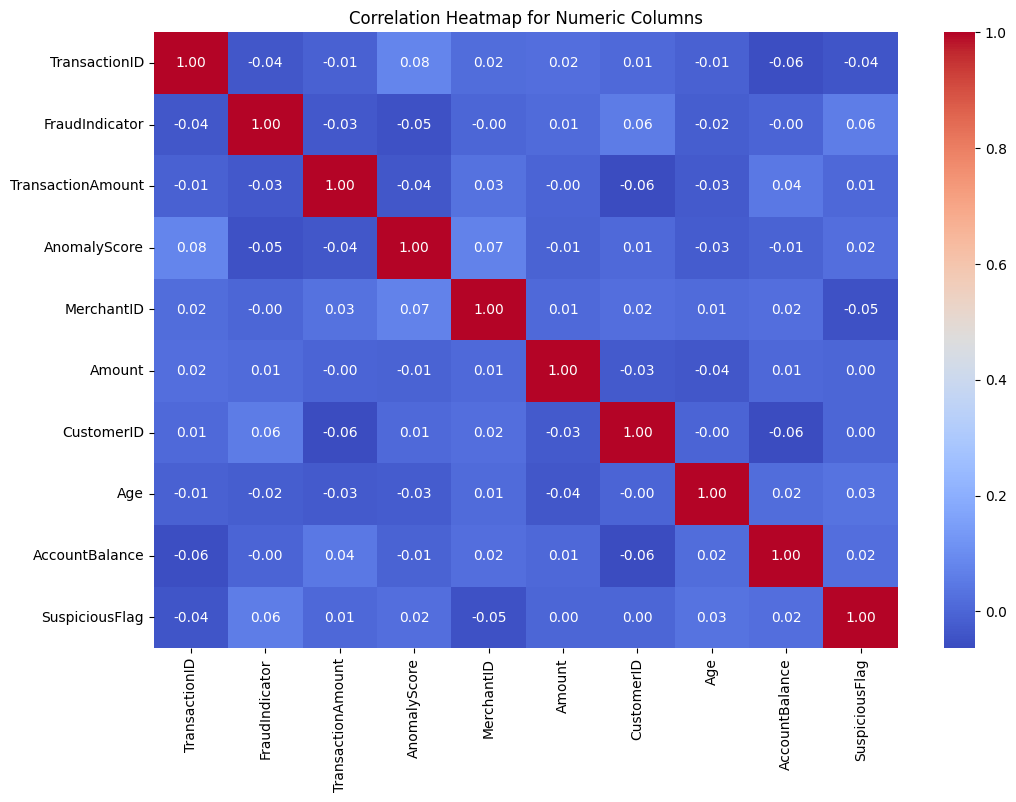

In [91]:

# Select only the numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numeric Columns')

plt.show()


In [92]:
# Dropping the columns as of now they are not mush corelated & also wouldn't damper the performance of model

columns_to_be_dropped = ['TransactionID','MerchantID','CustomerID','Name', 'Age', 'Address']

In [93]:
data1 = data.drop(columns_to_be_dropped, axis=1)
data1.head()

,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount,AccountBalance,LastLogin,SuspiciousFlag
0,0,Other,79.413607,0.686699,2022-01-01 00:00:00,55.530334,2869.689912,2024-08-09,0
1,0,Online,12.053087,0.081749,2022-01-01 01:00:00,12.881180,9527.947107,2022-01-27,0
2,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,50.176322,9288.355525,2024-08-12,0
3,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,41.634001,5588.049942,2024-03-06,0
4,0,Other,54.051618,0.034059,2022-01-01 04:00:00,78.122853,7324.785332,2024-08-03,0


In [94]:
data1['FraudIndicator'].value_counts(), data1['SuspiciousFlag'].value_counts(), data1['Category'].value_counts()

(FraudIndicator
 0    955
 1     45
 Name: count, dtype: int64,
 SuspiciousFlag
 0    975
 1     25
 Name: count, dtype: int64,
 Category
 Other     210
 Food      204
 Travel    198
 Online    196
 Retail    192
 Name: count, dtype: int64)

**Feature Engineering**

In [95]:
# Using Feature Engineering Creating two Columns
# Hour of Transaction = hour
# Gap between the day of transaction and last login in days = gap
if pd.api.types.is_datetime64_any_dtype(data['Timestamp']):
    print("The 'Timestamp' column is already in datetime format.")
else:
    print("The 'Timestamp' column is not in datetime format.")

The 'Timestamp' column is not in datetime format.


Converting TimeStamp to datetime format

In [96]:
data1['Timestamp1'] = pd.to_datetime(data1['Timestamp'])

print(data1.dtypes)

FraudIndicator                int64
Category                     object
TransactionAmount           float64
AnomalyScore                float64
Timestamp                    object
Amount                      float64
AccountBalance              float64
LastLogin                    object
SuspiciousFlag                int64
Timestamp1           datetime64[ns]
dtype: object


In [97]:
data1['Hour'] = data1['Timestamp1'].dt.hour

In [98]:
data1['LastLogin'] = pd.to_datetime(data1['LastLogin'])

In [99]:
data1['gap'] = (data1['Timestamp1'] - data1['LastLogin']).dt.days.abs()

In [100]:
data1.head()

,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount,AccountBalance,LastLogin,SuspiciousFlag,Timestamp1,Hour,gap
0,0,Other,79.413607,0.686699,2022-01-01 00:00:00,55.530334,2869.689912,2024-08-09,0,2022-01-01 00:00:00,0,951
1,0,Online,12.053087,0.081749,2022-01-01 01:00:00,12.881180,9527.947107,2022-01-27,0,2022-01-01 01:00:00,1,26
2,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,50.176322,9288.355525,2024-08-12,0,2022-01-01 02:00:00,2,954
3,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,41.634001,5588.049942,2024-03-06,0,2022-01-01 03:00:00,3,795
4,0,Other,54.051618,0.034059,2022-01-01 04:00:00,78.122853,7324.785332,2024-08-03,0,2022-01-01 04:00:00,4,945


**Data Modelling**


In [101]:
X = data1.drop(['FraudIndicator','Timestamp','Timestamp1','LastLogin'],axis=1)
Y = data1['FraudIndicator']

In [102]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Category' column
X['Category'] = label_encoder.fit_transform(X['Category'])
X

,Category,TransactionAmount,AnomalyScore,Amount,AccountBalance,SuspiciousFlag,Hour,gap
0,2,79.413607,0.686699,55.530334,2869.689912,0,0,951
1,1,12.053087,0.081749,12.881180,9527.947107,0,1,26
2,4,33.310357,0.023857,50.176322,9288.355525,0,2,954
3,4,46.121117,0.876994,41.634001,5588.049942,0,3,795
4,2,54.051618,0.034059,78.122853,7324.785332,0,4,945
...,...,...,...,...,...,...,...,...
995,0,89.457059,0.266778,19.876750,1290.323059,0,11,369
996,3,47.958030,0.512483,96.299792,7067.831609,0,12,524
997,0,64.210046,0.367740,75.164459,9088.738359,0,13,612
998,4,64.684167,0.960364,93.633040,9352.655675,0,14,886


train,test,splitting the data

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [104]:
X_train.shape,Y_test.shape

((800, 8), (200,))

In [105]:
# Logistic Regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.945


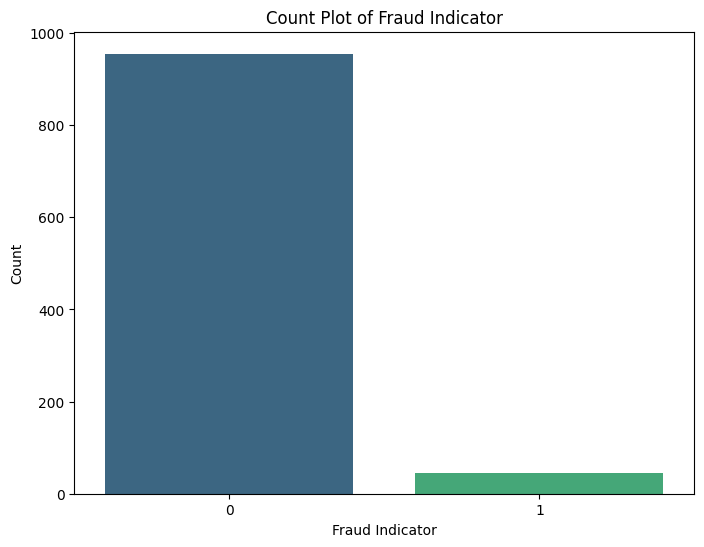

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with a 'FraudIndicator' column
# Load your data into the DataFrame if not already done

# Create a count plot for the 'FraudIndicator' column
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
sns.countplot(data=data1, x='FraudIndicator', palette='viridis')
plt.title('Count Plot of Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()


In [107]:
from sklearn.metrics import confusion_matrix

def calculate_fpr(model, X_test, y_test):

    y_pred = model.predict(X_test)
    confusion = confusion_matrix(y_test, y_pred)

    # Extract False Positives and True Negatives
    false_positive = confusion[0, 1]
    true_negative = confusion[0, 0]

    # Calculate False Positive Rate (FPR)
    if (false_positive + true_negative) > 0:
        fpr = (false_positive / (false_positive + true_negative)) * 100
    else:
        fpr = 0

    return fpr

In [108]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features to [0, 1] range
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE for oversampling
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Define FROST function
def generate_frost_samples(X_minority, initial_feature_index, k=5, m=1.5):
    initial_feature_values = X_minority[:, initial_feature_index]
    similarity_matrix = 1 / (1 + np.abs(initial_feature_values[:, np.newaxis] - initial_feature_values))
    k_nearest_indices = np.argsort(similarity_matrix, axis=1)[:, -k:]
    synthetic_samples_initial = []
    for i in range(len(initial_feature_values)):
        for j in k_nearest_indices[i]:
            synthetic_value = initial_feature_values[i] + m * (initial_feature_values[j] - initial_feature_values[i])
            synthetic_sample = np.copy(X_minority[i])
            synthetic_sample[initial_feature_index] = synthetic_value
            synthetic_samples_initial.append(synthetic_sample)
    return np.array(synthetic_samples_initial)

# Apply FROST for oversampling
initial_feature_index = 0  # Choose the index of the initial feature to oversample
X_train_frost = generate_frost_samples(X_train_scaled[y_train == 1], initial_feature_index, k=5, m=1.5)

# Combine original and synthetic samples
X_train_combined = np.vstack((X_train_scaled, X_train_frost))
y_train_combined = np.concatenate((y_train, np.ones(len(X_train_frost))))

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the number of folds for k-fold cross-validation
k_folds = KFold(n_splits=5)

# Perform cross-validation and calculate the scores for SMOTE
scores_smote = cross_val_score(clf, X_train_smote, y_train_smote, cv=k_folds)

# Perform cross-validation and calculate the scores for FROST
scores_frost = cross_val_score(clf, X_train_combined, y_train_combined, cv=k_folds)

# Print the cross-validation scores for each fold
print("SMOTE Cross Validation Scores: ", scores_smote)
print("FROST Cross Validation Scores: ", scores_frost)

# Print the average cross-validation score
print("Average SMOTE CV Score: ", scores_smote.mean())
print("Average FROST CV Score: ", scores_frost.mean())


SMOTE Cross Validation Scores:  [0.87213115 0.90491803 0.90491803 0.89508197 0.94078947]
FROST Cross Validation Scores:  [0.91919192 0.92424242 0.93434343 0.93939394 0.93939394]
Average SMOTE CV Score:  0.9035677308024159
Average FROST CV Score:  0.9313131313131313


In [109]:
# Retraining Logistic regression using SAMPLED Data

model_smote = LogisticRegression()
model_frost = LogisticRegression()

# Train the model on the training data
model_smote.fit(X_train_smote, y_train_smote)
model_frost.fit(X_train_combined, y_train_combined)


# Make predictions on the testing data
y_predSMOTE = model_smote.predict(X_test)
y_predFROST = model_frost.predict(X_test)

# Calculate and print various metrics to evaluate the model's performance
accuracySMOTE = accuracy_score(Y_test, y_predSMOTE)
precisionSMOTE = precision_score(Y_test, y_predSMOTE)
recallSMOTE = recall_score(Y_test, y_predSMOTE)
f1SMOTE = f1_score(Y_test, y_predSMOTE)
confusionSMOTE = confusion_matrix(Y_test, y_predSMOTE)

accuracyFROST = accuracy_score(Y_test, y_predFROST)
precisionFROST = precision_score(Y_test, y_predFROST)
recallFROST = recall_score(Y_test, y_predFROST)
f1FROST = f1_score(Y_test, y_predFROST)
confusionFROST = confusion_matrix(Y_test, y_predFROST)

print("Model Evaluation Metrics: SMOTE")
print("Accuracy:", accuracySMOTE)
print("Precision:", precisionSMOTE)
print("Recall:", recallSMOTE)
print("F1 Score:", f1SMOTE)
print("Confusion Matrix:")
print(confusionSMOTE)

print("Model Evaluation Metrics: FROST")
print("Accuracy:", accuracyFROST)
print("Precision:", precisionFROST)
print("Recall:", recallFROST)
print("F1 Score:", f1FROST)
print("Confusion Matrix:")
print(confusionFROST)

Model Evaluation Metrics: SMOTE
Accuracy: 0.055
Precision: 0.055
Recall: 1.0
F1 Score: 0.10426540284360189
Confusion Matrix:
[[  0 189]
 [  0  11]]
Model Evaluation Metrics: FROST
Accuracy: 0.285
Precision: 0.07142857142857142
Recall: 1.0
F1 Score: 0.13333333333333333
Confusion Matrix:
[[ 46 143]
 [  0  11]]


# HYPERPARAMETER TUNING WITH SMOTE

In [110]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
model = LogisticRegression()

# Define a range of hyperparameters to search
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': np.logspace(-3, 3, 7),  # Inverse of regularization strength (smaller values for stronger regularization)
    'solver': ['liblinear'],  # Solver for l1 regularization
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

# Get the best hyperparameters and corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the resampled data
y_pred = best_model.predict(X_train_smote)

# Calculate and print various metrics to evaluate the model's performance on the resampled data
accuracy = accuracy_score(y_train_smote, y_pred)
precision = precision_score(y_train_smote, y_pred)
recall = recall_score(y_train_smote, y_pred)
f1 = f1_score(y_train_smote, y_pred)
confusion = confusion_matrix(y_train_smote, y_pred)

print("Model Evaluation Metrics on Resampled Data- SMOTE:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)


Best Hyperparameters: {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
Model Evaluation Metrics on Resampled Data- SMOTE:
Accuracy: 0.6305774278215223
Precision: 0.6220858895705521
Recall: 0.6653543307086615
F1 Score: 0.6429930247305009
Confusion Matrix:
[[454 308]
 [255 507]]


# HYPERPARAMETER TUNING WITH FROST

In [111]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
model = LogisticRegression()

# Define a range of hyperparameters to search
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': np.logspace(-3, 3, 7),  # Inverse of regularization strength (smaller values for stronger regularization)
    'solver': ['liblinear'],  # Solver for l1 regularization
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_combined, y_train_combined)

# Get the best hyperparameters and corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the resampled data
y_pred = best_model.predict(X_train_combined)

# Calculate and print various metrics to evaluate the model's performance on the resampled data
accuracy = accuracy_score(y_train_combined, y_pred)
precision = precision_score(y_train_combined, y_pred)
recall = recall_score(y_train_combined, y_pred)
f1 = f1_score(y_train_combined, y_pred)
confusion = confusion_matrix(y_train_combined, y_pred)

print("Model Evaluation Metrics on Resampled Data- FROST:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)


Best Hyperparameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Model Evaluation Metrics on Resampled Data- FROST:
Accuracy: 0.7727272727272727
Precision: 0.5714285714285714
Recall: 0.05263157894736842
F1 Score: 0.0963855421686747
Confusion Matrix:
[[753   9]
 [216  12]]


# Evaluating with SMOTE for Gradient Boosting Classifier

In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

def evaluate_classification_models(X_train_smote, y_train_smote):
    # Split the resampled data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

    # Define a dictionary of classification models
    models = {
        "Gradient Boosting Classifier": GradientBoostingClassifier()
    }

    results = {}

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate confusion matrix
        confusion = confusion_matrix(y_test, y_pred)
        false_positive = confusion[0, 1]
        true_negative = confusion[0, 0]

        # Calculate False Positive Rate (FPR)
        if (false_positive + true_negative) > 0:
            fpr = (false_positive / (false_positive + true_negative)) * 100
        else:
            fpr = 0

        # Calculate and store various metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results[model_name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "False Positive Rate (FPR)": fpr,
            "Confusion Matrix": confusion
        }

    return results

results = evaluate_classification_models(X_train_smote, y_train_smote)
for model_name, model_result in results.items():
     print(f"Results for {model_name}:")
     for metric, value in model_result.items():
         print(f"{metric}: {value}")
     print()


Results for Gradient Boosting Classifier:
Accuracy: 0.9114754098360656
Precision: 0.9079754601226994
Recall: 0.925
F1 Score: 0.9164086687306502
False Positive Rate (FPR): 10.344827586206897
Confusion Matrix: [[130  15]
 [ 12 148]]



# Evaluating with FROST for Gradient Boosting Classifier

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

def evaluate_classification_models(X_train_combined, y_train_combined):
    # Split the resampled data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_train_combined, y_train_combined, test_size=0.2, random_state=42)

    # Define a dictionary of classification models
    models = {
        "Gradient Boosting Classifier": GradientBoostingClassifier()
    }

    results = {}

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate confusion matrix
        confusion = confusion_matrix(y_test, y_pred)
        false_positive = confusion[0, 1]
        true_negative = confusion[0, 0]

        # Calculate False Positive Rate (FPR)
        if (false_positive + true_negative) > 0:
            fpr = (false_positive / (false_positive + true_negative)) * 100
        else:
            fpr = 0

        # Calculate and store various metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results[model_name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "False Positive Rate (FPR)": fpr,
            "Confusion Matrix": confusion
        }

    return results

results = evaluate_classification_models(X_train_combined, y_train_combined)
for model_name, model_result in results.items():
     print(f"Results for {model_name}:")
     for metric, value in model_result.items():
         print(f"{metric}: {value}")
     print()


Results for Gradient Boosting Classifier:
Accuracy: 0.9696969696969697
Precision: 0.975
Recall: 0.8863636363636364
F1 Score: 0.9285714285714286
False Positive Rate (FPR): 0.6493506493506493
Confusion Matrix: [[153   1]
 [  5  39]]

